# 1. Perkenalan

Jimmy Jaya Nugraha 

# 2. Import Libraries

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



# 3. Data Loading

In [2]:
# Load data
df_ori = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
# duplicate data
df = df_ori.copy()

In [4]:
# Melihat data Head
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

> dalam data tersebut tidak terdapat null value atau expected missing value.

# 4. Exploratory Data Analysis (EDA)

In [6]:
# melihat data head
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<AxesSubplot:xlabel='month', ylabel='count'>

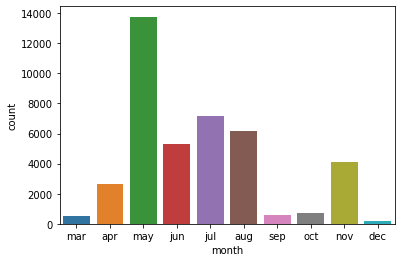

In [7]:
# melihat banyaknya data month 
sns.countplot(data = df, x = 'month', order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

> ternyata banyak nasabah yang dihubungi pada pertengahan tahun

<AxesSubplot:xlabel='pdays', ylabel='count'>

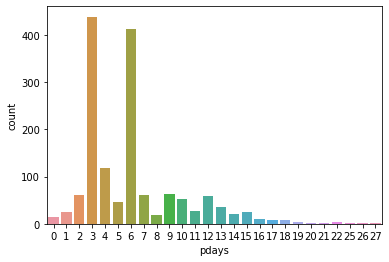

In [8]:
# melihat banyaknya nasabah yang pernah dihubungi untuk campaign sebelumnya
sns.countplot(data =df[df['pdays']!=999], x='pdays')

In [9]:
# Melihat banyaknya data yang pdaysnya 999 atau BELUM pernah ditelepon untuk campaign sebelumnya.
df[df['pdays']==999].shape

(39673, 21)

> Terlihat kalau banyak sekali nasabah yang belum dihubungi untuk campaign sebelumnya, menelaah dari artinya, nilai 999 disini akan membuat kekeliruan pembacaan data atau proses training, sehingga akan dibuat menjadi kolom kategorical.

<AxesSubplot:xlabel='pdays', ylabel='Count'>

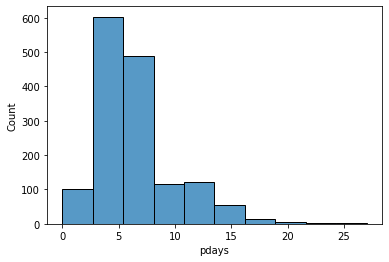

In [10]:
sns.histplot(data =df[df['pdays']!=999], x='pdays', bins=10)

In [11]:
# Membuat list bins dari histogram data dengan pdays!= 999
bin = 10
edges= np.histogram_bin_edges(df[df['pdays']!=999]['pdays'], bins =bin)
edge = np.array(edges, dtype=np.float32).reshape(-1,1)
kelompok=[]
for h,i in enumerate(edge):
    if h == len(edge)-1:
        break
    else:
        kelompok.append(str(edge[h][0]) + '-' +str(edge[h+1][0]))
kelompok

['0.0-2.7',
 '2.7-5.4',
 '5.4-8.1',
 '8.1-10.8',
 '10.8-13.5',
 '13.5-16.2',
 '16.2-18.9',
 '18.9-21.6',
 '21.6-24.3',
 '24.3-27.0']

In [12]:
# mengelompokan data berdasarkan pdays dan edges histogramnnya

df['pdays_group'] = pd.cut(df['pdays'], bins=edges, labels=kelompok)
# fillna kolom pdays_group dengan 'belum pernah dihubungi'

df['pdays_groups'] = df['pdays_group'].cat.add_categories('belum pernah dihubungi').fillna('belum pernah dihubungi')

# mendrop kolom bantuan pdays_group dari df
df.drop('pdays_group', axis=1, inplace=True)

# mendrop kolom pdays
df.drop('pdays', axis=1, inplace=True)


In [13]:
# melihat sample dari data
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_groups
3612,35,housemaid,married,basic.4y,no,no,no,telephone,may,fri,...,1,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,belum pernah dihubungi
37705,25,admin.,single,university.degree,no,yes,no,telephone,aug,thu,...,1,0,nonexistent,-2.9,92.201,-31.4,0.851,5076.2,no,belum pernah dihubungi
33316,32,blue-collar,divorced,basic.9y,no,yes,no,telephone,may,tue,...,4,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no,belum pernah dihubungi
14619,32,technician,single,professional.course,no,yes,no,cellular,jul,tue,...,1,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,belum pernah dihubungi
27261,45,self-employed,married,university.degree,no,no,no,cellular,nov,fri,...,5,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no,belum pernah dihubungi


In [14]:
# melihat nasabah yang belum pernah dihubungi (duration = 0)
df[df['duration']==0].shape

(4, 21)

In [15]:
df[df['duration']==0].head().T

,6251,23031,28063,33015
age,39,59,53,31
job,admin.,management,blue-collar,blue-collar
marital,married,married,divorced,married
education,high.school,university.degree,high.school,basic.9y
default,no,no,no,no
housing,yes,yes,yes,no
loan,no,no,no,no
contact,telephone,cellular,cellular,cellular
month,may,aug,apr,may
day_of_week,tue,tue,fri,mon


> ada 4 orang yang belum pernah dihubungi sama sekali, yang dimana hasilnya tidak akan valid sehingga akan didrop

In [16]:
# mendrop data yg durationnya 0
df.drop(df[df['duration']==0].index, inplace=True)

# Mereset index df
df.reset_index(drop=True, inplace=True)

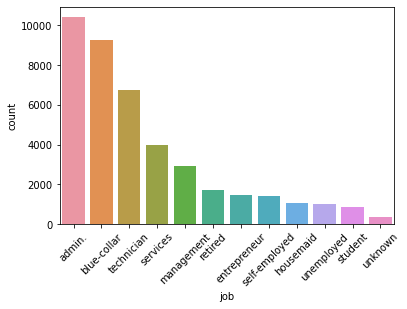

In [17]:
# melihat sebaran data setiap pekerjaan
sns.countplot(data = df, x = 'job', order=df['job'].value_counts().index)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

<AxesSubplot:ylabel='contact'>

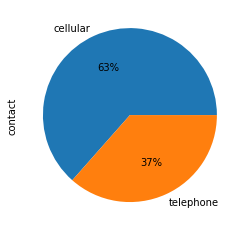

In [18]:
df['contact'].value_counts().plot(kind='pie', autopct='%.0f%%')

In [20]:
# membuat fungsi untuk membuat grafik catplot count dari persentasenya

def grafik_persentase (x, hue, data=df, order=[]):
    if order == []:
        for i in data[x].value_counts().index:
            order.append(i)
    plt.figure(figsize=(20,10))
    df_for_graph = df[[x,hue]].groupby(x).value_counts(normalize=True).reset_index().rename(columns={0:'prob'})
    df_for_graph['prob']= df_for_graph['prob']*100

    g = sns.catplot(x=x,y='prob',hue=hue,kind='bar',data=df_for_graph, order=order, height=5, aspect=2)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        if p.get_height() > 0:
            txt = str(p.get_height().round(1)) + '%'
            txt_x = p.get_x() 
            txt_y = p.get_height()
            g.ax.text(txt_x,txt_y,txt)

    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.show()

<Figure size 1440x2880 with 0 Axes>

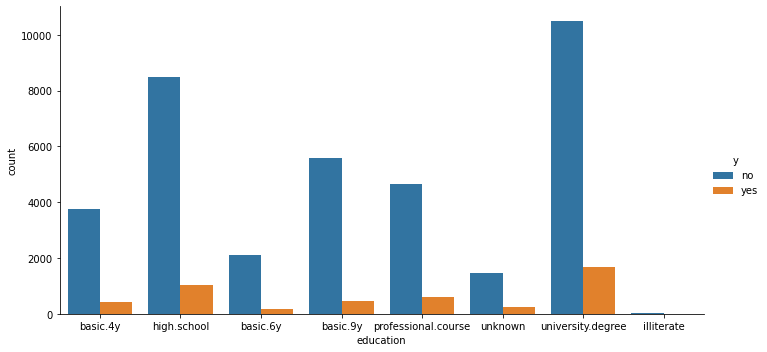

In [21]:
# Melihat pengaruh dari education terhadap target y (count)
plt.figure(figsize=(20,40))
sns.catplot(data=df, x='education', hue='y', kind='count', height=5, aspect=2)
plt.show()

<Figure size 1440x720 with 0 Axes>

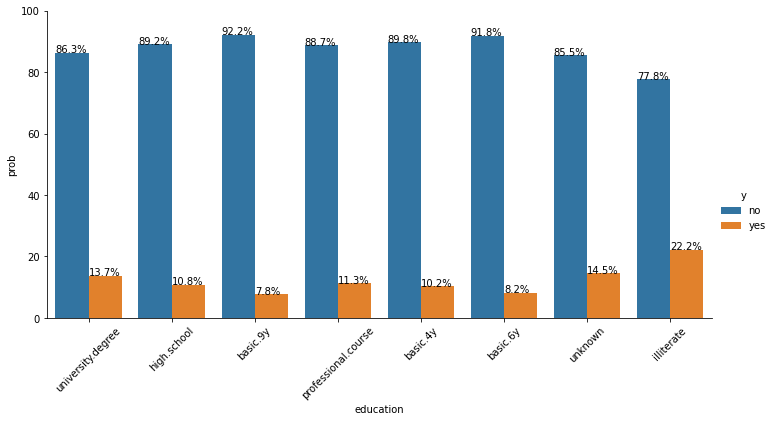

In [22]:
# melihat pengaruh dari education terhadap target y Persentase
grafik_persentase('education','y',df)

> terlihat tingkat edukasi memiliki pengaruh terhadap nilai target, terutama pada illiterate

<Figure size 1440x720 with 0 Axes>

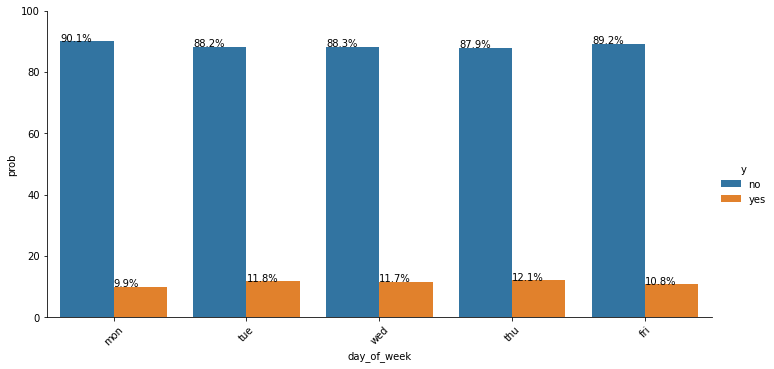

In [23]:
# melihat pengaruh dari day of the week dan y
grafik_persentase('day_of_week','y',df, order=['mon','tue','wed','thu','fri'])

> karena terlihat hampir tidak ada pengaruhnya terhadap keberhasilan campaign, maka day of the week akan didrop.

In [24]:
# mendrop day of the week dari df
df.drop('day_of_week', axis=1, inplace=True)

<Figure size 1440x720 with 0 Axes>

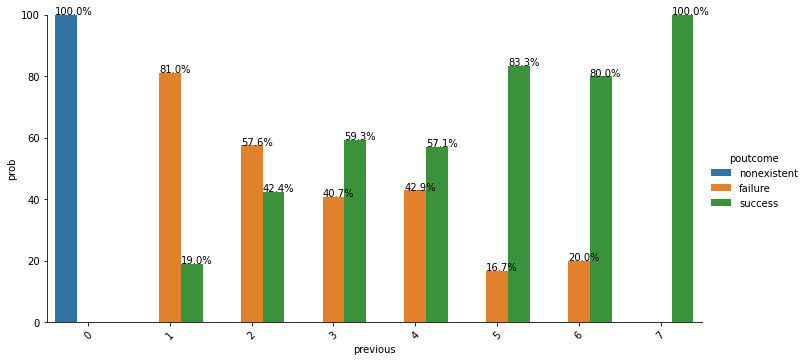

In [25]:
# melihat pengaruh jumlah previous terhadap poutcome
grafik_persentase('previous','poutcome', df, order=[])

> Terlihat hasil dari previous campaign, makin banyak dihubungi, maka makin besar tingkat suksesnya, tapi jika tidak dihubungi maka tidak akan menjadi nonexistent

<Figure size 1440x720 with 0 Axes>

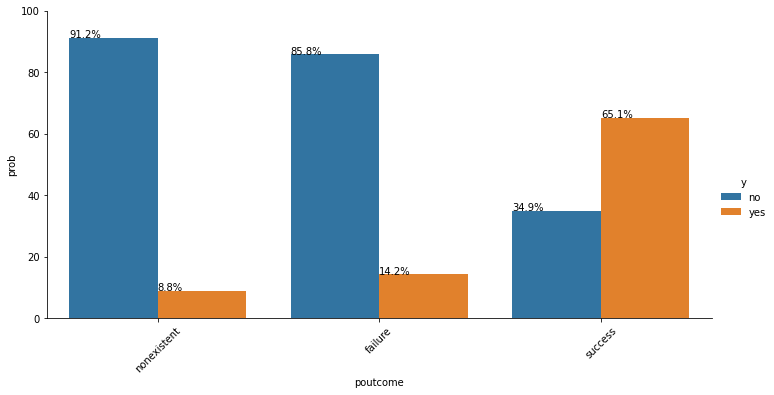

In [26]:
#Melihat pengaruh poutcome terhadap y
grafik_persentase('poutcome','y',df, order=[])

In [27]:
df['poutcome'].value_counts()

nonexistent    35559
failure         4252
success         1373
Name: poutcome, dtype: int64

> meskipun hanya sedikit yang dikontak pada campaign sebelumnya, tapi secara persentase, jika p outcomenya success, maka besar kemungkinan saat dikontak pada campaign selanjutnya juga akan sukses.

<Figure size 1440x720 with 0 Axes>

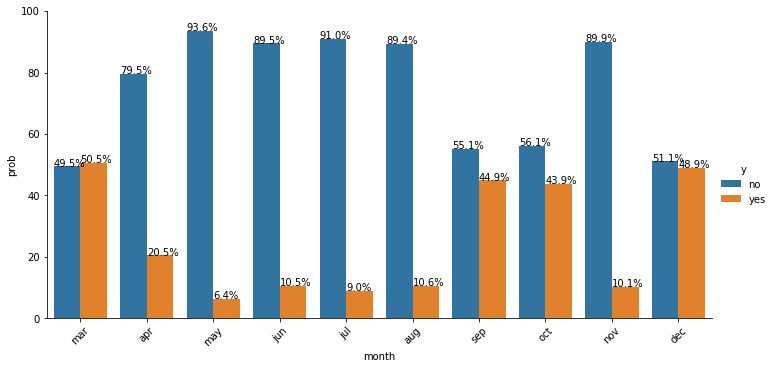

In [28]:
grafik_persentase('month','y',df, order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

> karena terlihat ada pengaruhnya, terutama pada bulan mei, maka akan tetap dipertahankan kolomnya.

> sepertinya ada sesuatu pada bulan mei yang membuatnya sangat jelek performanya

<Figure size 1440x720 with 0 Axes>

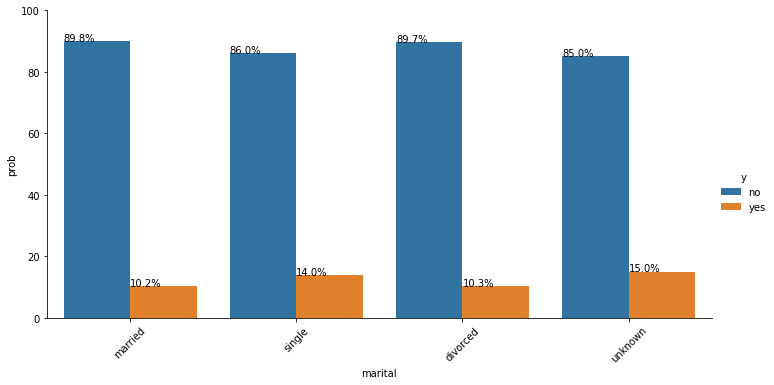

In [29]:
#Melihat pengaruh marital terhadap y
grafik_persentase('marital','y',df, order=[])

> hampir tidak terlihat perbedaan antara stiap status marital, sehingga akan didrop

In [30]:
# mendrop kolom marital dari df
df.drop('marital', axis=1, inplace=True)

<Figure size 1440x720 with 0 Axes>

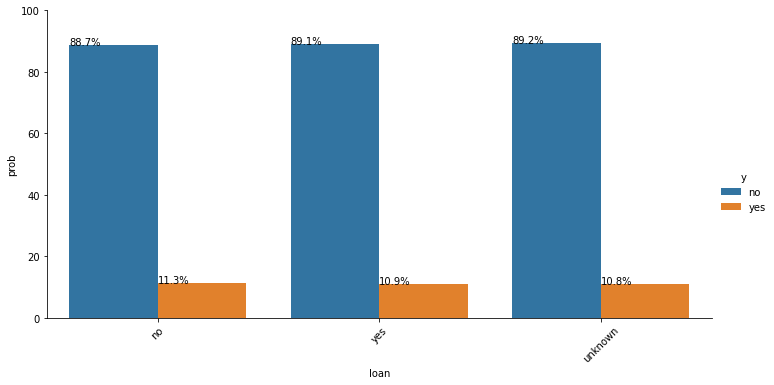

In [31]:
#Melihat pengaruh loan terhadap y
grafik_persentase('loan','y',df, order=[])

> kolom loan juga tidak ada pengaruhnya terhadap y, sehingga akan didrop

In [32]:
# mendrop kolom loan dari df
df.drop('loan', axis=1, inplace=True)

<Figure size 1440x720 with 0 Axes>

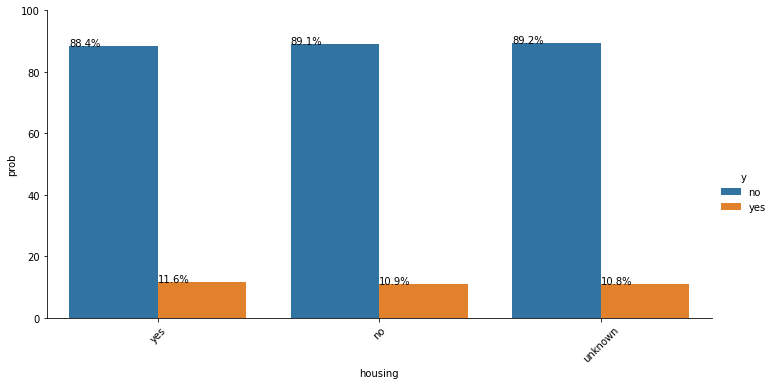

In [33]:
#Melihat pengaruh housing terhadap y
grafik_persentase('housing','y',df, order=[])

> Kolom housing juga tidak memiliki pengaruh terhadap nilai y secara persentase, sehingga akan didrop

In [34]:
# drop kolom housing dari df
df.drop('housing', axis=1, inplace=True)

<Figure size 1440x720 with 0 Axes>

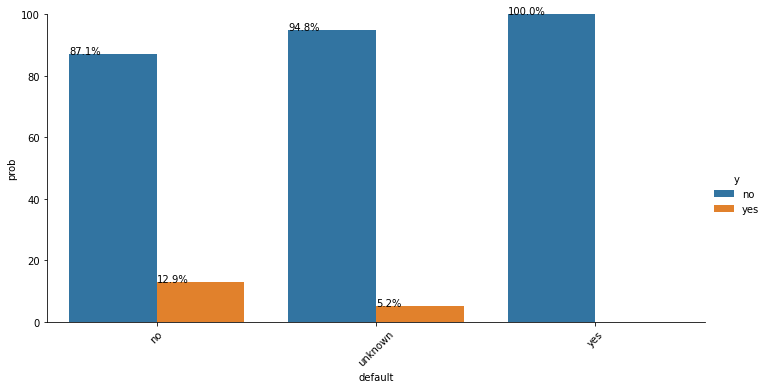

In [35]:
#Melihat pengaruh default terhadap y
grafik_persentase('default','y',df, order=[])

In [36]:
# melihat data value count dari default
df['default'].value_counts()

no         32584
unknown     8597
yes            3
Name: default, dtype: int64

> Karena sangat minim data yang defaultnya yes, maka akan didrop.

In [37]:
# drop kolom default
df.drop('default', axis=1, inplace=True)

<Figure size 1440x720 with 0 Axes>

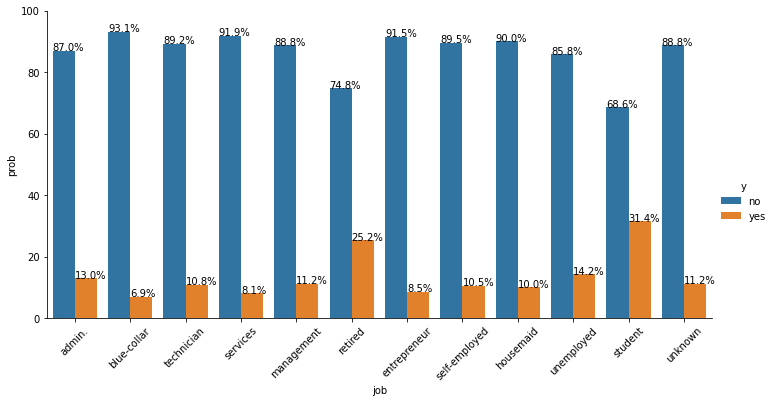

In [38]:
#Melihat pengaruh job terhadap y
grafik_persentase('job','y',df, order=[])

> job kelihatannya ada pengaruhnya, terutama pada job management retired dan unemployed student. Alhasil tidak akan didrop

<Figure size 1440x720 with 0 Axes>

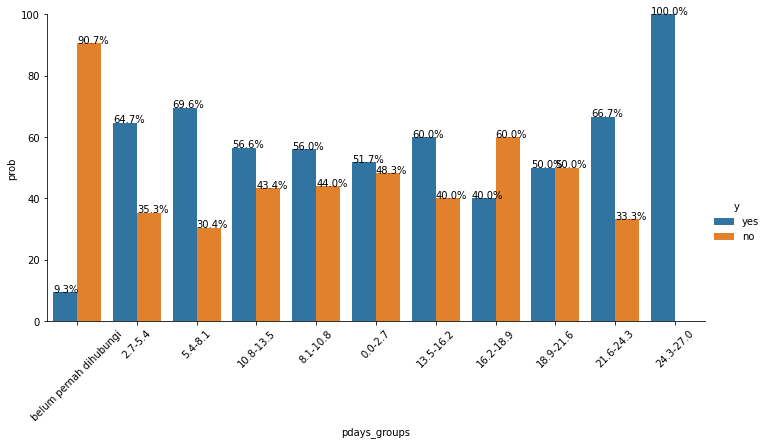

In [39]:
#Melihat pengaruh pdays group terhadap y
grafik_persentase('pdays_groups','y',df, order=[])

> kolom pdays group juga menunjukan adanya pengaruh terhadap y

In [40]:
# Mengconvert data y target menjadi integer dengan labelencoder (no =0, yes =1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

Text(0.5, 1.0, 'Correlation Heatmap')

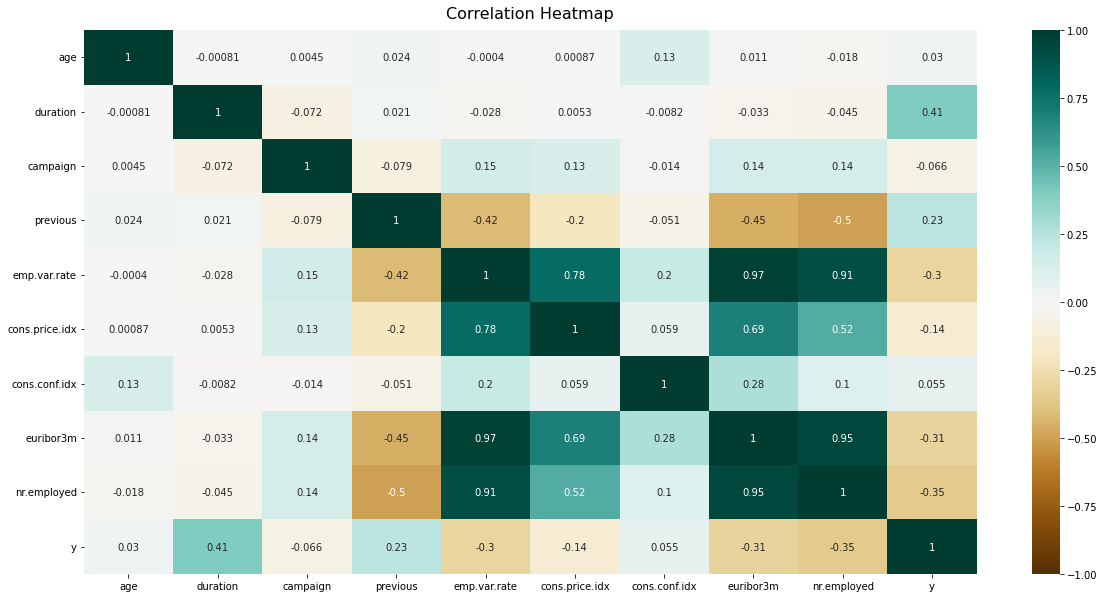

In [41]:
# melihat korelasi data dengan heat map
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)

In [42]:
# Membuat matriks korelasi
corr_matrix = df.corr().abs()

# Menselect lower triangle dari matriks
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool),np.nan)
lower

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,0.000815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,0.004468,0.071633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,0.024384,0.020608,0.079122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp.var.rate,0.000395,0.027993,0.150711,0.420520,NaN,NaN,NaN,NaN,NaN,NaN
cons.price.idx,0.000870,0.005275,0.127855,0.203151,0.775331,NaN,NaN,NaN,NaN,NaN
cons.conf.idx,0.129366,0.008194,0.013809,0.050947,0.195953,0.058916,NaN,NaN,NaN,NaN
euribor3m,0.010745,0.032926,0.135091,0.454530,0.972242,0.688217,0.277603,NaN,NaN,NaN
nr.employed,0.017755,0.044724,0.144052,0.501358,0.906965,0.522020,0.100436,0.945155,NaN,NaN
y,0.030419,0.405261,0.066337,0.230172,0.298359,0.136230,0.054875,0.307799,0.354698,NaN


In [43]:
# Melist semua fitur yang memiliki korelasi lebih dari 0.8
to_drop=[]
for column in lower.columns:
    if any(lower[column] > 0.8):
        to_drop.append(column)
to_drop

['emp.var.rate', 'euribor3m']

In [44]:
# Drop fitur
df.drop(to_drop, axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

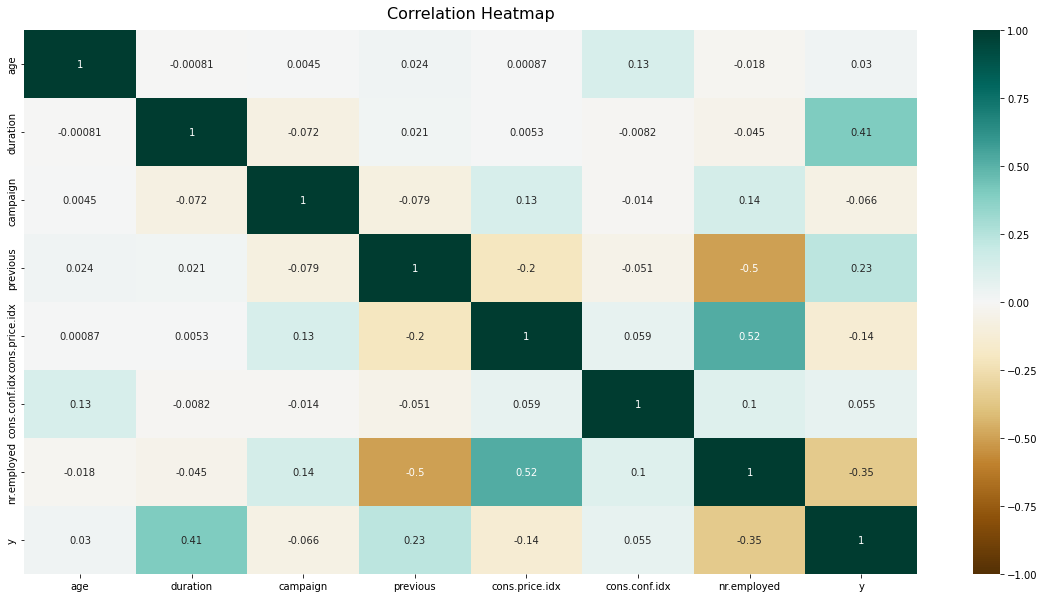

In [45]:
# Melihat heatmap setelah drop fitur
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)

# 5. Data Preprocessing

## 5.1. Memisahkan data inference, data train, data test

In [46]:
# Melihat df head
df.head()

,age,job,education,contact,month,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y,pdays_groups
0,56,housemaid,basic.4y,telephone,may,261,1,0,nonexistent,93.994,-36.4,5191.0,0,belum pernah dihubungi
1,57,services,high.school,telephone,may,149,1,0,nonexistent,93.994,-36.4,5191.0,0,belum pernah dihubungi
2,37,services,high.school,telephone,may,226,1,0,nonexistent,93.994,-36.4,5191.0,0,belum pernah dihubungi
3,40,admin.,basic.6y,telephone,may,151,1,0,nonexistent,93.994,-36.4,5191.0,0,belum pernah dihubungi
4,56,services,high.school,telephone,may,307,1,0,nonexistent,93.994,-36.4,5191.0,0,belum pernah dihubungi


In [47]:
# Mendefinisikan target kolom
target = 'y'

# Memisahkan Inference-set from dataset
df_inf =df.sample(10, random_state=25)
df_inf.reset_index(drop=True, inplace=True)
X_inf = df_inf.drop(target, axis=1)
y_inf = df_inf[target]

# Mendrop data yang dijadikan df_inf dan reset index
df_tanpa_inf=df.drop(df_inf.index)
df_tanpa_inf.reset_index(drop=True, inplace=True)

# Memisahkan target dan data
X =df_tanpa_inf.drop(target, axis=1)
y =df_tanpa_inf[target]

# Memisahkan data training dan test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state=27, stratify=y)

# Melihat jumlah train set dan test set
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('X_inf :',X_inf.shape)

X_train : (32939, 13)
X_test : (8235, 13)
X_inf : (10, 13)


## 5.2 Memisahkan kolom numerikal dan kategorikal

In [48]:
# Memisahkan kolom numerical
x = X_train.select_dtypes(include=np.number).columns
num_columns=[]
for i in x:
    num_columns.append(i)
num_columns

['age',
 'duration',
 'campaign',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed']

In [49]:
# Membuat Kolom kategorical
cat_columns =[]
for i in X_train.columns:
    if i not in num_columns:
        cat_columns.append(i)
cat_columns

['job', 'education', 'contact', 'month', 'poutcome', 'pdays_groups']

## 5.3 Handling Outlayer

In [50]:
# melihat skewness dari dari semua kolom np.number dari data training
skewness =X_train[num_columns].skew().reset_index().rename(columns={'index':'column_name', 0:'skewness'})
skewness.sort_values(by='skewness', ascending=False)

,column_name,skewness
2,campaign,4.515544
3,previous,3.874303
1,duration,3.006606
0,age,0.788556
5,cons.conf.idx,0.293643
4,cons.price.idx,-0.224818
6,nr.employed,-1.043217


> Terlihat ada kolom yang cukup skewed, yaitu campaign, previous, duration. Maka data akan dilakukan pendropan outlayer dimana normal distribution akan menggunakan 3xstd dan skewed menggunakan 1.5x IQR

In [51]:
# Membuat fungsi remove outlayer normal distribution
def remove_outlayer_normal (data, y_pasangan, column):
    mean = data[column].mean()
    std = data[column].std()
    outlayer = data[column][(data[column] < mean - 1.5*std) | (data[column] > mean + 1.5*std)]
    data.drop(outlayer.index, inplace=True)
    data.reset_index()
    y_pasangan.drop(outlayer.index, inplace=True)
    y_pasangan.reset_index()
    if outlayer.index.shape[0]==0:
        print('Kolom',column ,'tidak memiliki outlayer')
    else:
        print('Shape setelah drop outlayer (normal) di kolom',column,' : ',data.shape)
    return data, y_pasangan
    

# Membuat fungsi remove outlayer skewed distribution
def remove_outlayer_skewed (data,y_pasangan, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    outlayer = data[column][(data[column] < q1 - 3*iqr) | (data[column] > q3 + 3*iqr)]
    data.drop(outlayer.index, inplace=True)
    data.reset_index()
    y_pasangan.drop(outlayer.index, inplace=True)
    y_pasangan.reset_index()
    if outlayer.index.shape[0]==0:
        print('Kolom',column ,'tidak memiliki outlayer')
    else:
        print('Shape setelah drop outlayer (skewed) di kolom',column,' : ',data.shape)
    return data, y_pasangan

In [52]:
# menggabungkan fungsi remove outlayer normal dan skewed
def remove_outlayer_all (X_data, y_data, column, exception_column_list=[]):
    awal = X_data.shape[0]
    print('shape awal :', X_data.shape)
    for i in X_data[column]:
        if i not in exception_column_list:
            if X_data[i].skew()>0.5:
                remove_outlayer_skewed(X_data, y_data, i)
            else:
                remove_outlayer_normal(X_data, y_data, i)
    akhir = X_data.shape[0]
    print('Jumlah data awal : ', awal)
    print('Jumlah data akhir : ', akhir)
    print('persentase selisih : ', ((awal-akhir)/awal)*100,'%')
    return X_data, y_data

In [53]:
# meremove outlayer dari data training

X_train, y_train = remove_outlayer_all(X_train, y_train, num_columns,['previous'])

shape awal : (32939, 13)
Shape setelah drop outlayer (skewed) di kolom age  :  (32935, 13)
Shape setelah drop outlayer (skewed) di kolom duration  :  (32101, 13)
Shape setelah drop outlayer (skewed) di kolom campaign  :  (31249, 13)
Shape setelah drop outlayer (normal) di kolom cons.price.idx  :  (26242, 13)
Shape setelah drop outlayer (normal) di kolom cons.conf.idx  :  (25888, 13)
Shape setelah drop outlayer (normal) di kolom nr.employed  :  (24567, 13)
Jumlah data awal :  32939
Jumlah data akhir :  24567
persentase selisih :  25.416679316311967 %


In [54]:
# melihat shape dari X_train dan y_train
print('Shape X_train :', X_train.shape)
print('Shape y_train :', y_train.shape)

Shape X_train : (24567, 13)
Shape y_train : (24567,)


In [55]:
# melihat describe dari kolom numerical
X_train[num_columns].describe()

,age,duration,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed
count,24567.000000,24567.000000,24567.000000,24567.000000,24567.000000,24567.00000,24567.000000
mean,39.536614,232.262629,2.249359,0.115399,93.502660,-40.97184,5178.349102
std,9.397698,184.843342,1.643319,0.337959,0.438739,4.18347,53.308778
min,18.000000,1.000000,1.000000,0.000000,92.756000,-47.10000,5076.200000
25%,32.000000,102.000000,1.000000,0.000000,93.075000,-46.20000,5099.100000
50%,38.000000,175.000000,2.000000,0.000000,93.444000,-42.00000,5191.000000
75%,46.000000,303.000000,3.000000,0.000000,93.918000,-36.40000,5228.100000
max,88.000000,971.000000,9.000000,3.000000,93.994000,-36.10000,5228.100000


## 5.4 Handling Missing Value

In [56]:
# melihat data head
X_train.head()

,age,job,education,contact,month,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,pdays_groups
25521,29,technician,basic.9y,cellular,nov,224,1,0,nonexistent,93.200,-42.0,5195.8,belum pernah dihubungi
28797,39,admin.,high.school,cellular,apr,433,2,0,nonexistent,93.075,-47.1,5099.1,belum pernah dihubungi
4146,28,admin.,high.school,telephone,may,165,5,0,nonexistent,93.994,-36.4,5191.0,belum pernah dihubungi
26110,41,management,university.degree,cellular,nov,501,4,0,nonexistent,93.200,-42.0,5195.8,belum pernah dihubungi
34884,39,technician,high.school,cellular,may,642,1,0,nonexistent,92.893,-46.2,5099.1,belum pernah dihubungi


In [57]:
# melihat jumlah missing value
X_train.isnull().sum()

age               0
job               0
education         0
contact           0
month             0
duration          0
campaign          0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
pdays_groups      0
dtype: int64

In [58]:
# Melihat unexpected missing value yang bertanda 'unknown'
X_train[X_train=='unknown'].count()

age                 0
job               178
education         899
contact             0
month               0
duration            0
campaign            0
previous            0
poutcome            0
cons.price.idx      0
cons.conf.idx       0
nr.employed         0
pdays_groups        0
dtype: int64

In [59]:
# Mendrop row yang ada unknownnya
for i in X_train.columns:
    y_train.drop(X_train[X_train[i]=='unknown'].index, inplace=True)
    X_train.drop(X_train[X_train[i]=='unknown'].index, inplace=True)

In [60]:
# reset index dari X_train dan y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [61]:
# Melihat unexpected missing value yang bertanda 'unknown'
X_train[X_train=='unknown'].count()

age               0
job               0
education         0
contact           0
month             0
duration          0
campaign          0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
pdays_groups      0
dtype: int64

In [62]:
X_train.shape

(23557, 13)

In [63]:
y_train.shape

(23557,)

## Feature Splitting

In [64]:
# Split X_train dan X_test ke dalam categorical dan numerical
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## Feature Scaling

In [65]:
# Mendefinisikan Feature Scalling dengan StandardScaler
scaler = MinMaxScaler()

# Fit hanya kolom X_train_num
scaler.fit(X_train_num)

# Transform X_train dan X_test
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [66]:
# Melihat shape dari yang sudah discale
X_train_num_scaled.shape

(23557, 7)

In [67]:
X_train_num.describe()

,age,duration,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed
count,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000
mean,39.385108,232.266503,2.249395,0.116738,93.497760,-40.993743,5178.174224
std,9.327270,185.119613,1.642865,0.339494,0.438476,4.186308,53.407509
min,18.000000,1.000000,1.000000,0.000000,92.756000,-47.100000,5076.200000
25%,32.000000,102.000000,1.000000,0.000000,93.075000,-46.200000,5099.100000
50%,38.000000,175.000000,2.000000,0.000000,93.444000,-42.000000,5191.000000
75%,46.000000,303.000000,3.000000,0.000000,93.918000,-36.400000,5228.100000
max,88.000000,971.000000,9.000000,3.000000,93.994000,-36.100000,5228.100000


## Feature Encoding

In [68]:
# Mendefinsikan Feature Encoding dengan OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit hanya pada kolom X_train_cat
enc.fit(X_train_cat)

# Transform X_train_cat dan X_Test_cat
X_train_cat_encoded = enc.transform(X_train_cat)
X_test_cat_encoded = enc.transform(X_test_cat)

In [69]:
# melihat shape dari X_train_cat_encoded
X_train_cat_encoded.shape

(23557, 37)

In [70]:
X_train_cat_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Concatenate data numerical dan categorical

In [71]:
# Concatenate data numerikal dan kategorical
X_train_final = np.concatenate((X_train_num_scaled, X_train_cat_encoded), axis=1)
X_test_final = np.concatenate((X_test_num_scaled, X_test_cat_encoded), axis=1)

In [72]:
# melihat shape dari data final
X_train_final.shape

(23557, 44)

In [73]:
X_train_final

array([[0.15714286, 0.22989691, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.3       , 0.44536082, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.14285714, 0.16907216, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.25714286, 0.36597938, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.4       , 0.25360825, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.07010309, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [74]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
23552    0
23553    0
23554    0
23555    0
23556    0
Name: y, Length: 23557, dtype: int32

# 6. Model Definition

In [75]:
# Mendefinisikan Logistic Regression
logreg = LogisticRegression(random_state=22, max_iter=300)

# Mendefinisikan SVM
svm = SVC(random_state=22, max_iter=200)

# Mendefinisikan Decision Tree
dt = DecisionTreeClassifier(random_state=22)

# Mendefinisikan Random Forest
rf = RandomForestClassifier(random_state=22)

# Mendefinsikan Naive Bayes
nb = MultinomialNB()

# Mendefinisikan SGDC classifier
sgdc = SGDClassifier( random_state=22, max_iter=50)

# Mendefinisikan KNN classifier
knn = KNeighborsClassifier()


# 7. Model Training

## 7.1 Cross Validation Model Awal

In [76]:
# Melakukan cross validation logreg dengan cross validation
acc_train_cross_val_logreg_1 = cross_val_score(logreg, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_logreg_1)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_logreg_1.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_logreg_1.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_logreg_1.mean()-acc_train_cross_val_logreg_1.std()) , '-', (acc_train_cross_val_logreg_1.mean()+acc_train_cross_val_logreg_1.std()))

Accuracy - All - Cross Validation  :  [0.94248727 0.94609508 0.93844194 0.94056464 0.94268733]
Accuracy - Mean - Cross Validation :  0.9420552501658692
Accuracy - Std - Cross Validation  :  0.002537095399886928
Accuracy - Range of Test-Set       :  0.9395181547659823 - 0.9445923455657561


In [77]:
# Melakukan cross validation svm dengan cross validation
acc_train_cross_val_svm_1 = cross_val_score(svm, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_svm_1)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_svm_1.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_svm_1.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_svm_1.mean()-acc_train_cross_val_svm_1.std()) , '-', (acc_train_cross_val_svm_1.mean()+acc_train_cross_val_svm_1.std()))

C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFounda

Accuracy - All - Cross Validation  :  [0.8344652  0.92105263 0.80046699 0.91976226 0.89025685]
Accuracy - Mean - Cross Validation :  0.8732007846390649
Accuracy - Std - Cross Validation  :  0.04804025350061737
Accuracy - Range of Test-Set       :  0.8251605311384476 - 0.9212410381396823


In [78]:
# Melakukan cross validation dt dengan cross validation
acc_train_cross_val_dt_1 = cross_val_score(dt, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_dt_1)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_dt_1.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_dt_1.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_dt_1.mean()-acc_train_cross_val_dt_1.std()) , '-', (acc_train_cross_val_dt_1.mean()+acc_train_cross_val_dt_1.std()))

Accuracy - All - Cross Validation  :  [0.91850594 0.91871817 0.91254511 0.91870091 0.9208236 ]
Accuracy - Mean - Cross Validation :  0.917858746588467
Accuracy - Std - Cross Validation  :  0.002788973055461464
Accuracy - Range of Test-Set       :  0.9150697735330056 - 0.9206477196439284


In [79]:
# Melakukan cross validation rf dengan cross validation
acc_train_cross_val_rf_1 = cross_val_score(rf, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_rf_1)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_rf_1.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_rf_1.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_rf_1.mean()-acc_train_cross_val_rf_1.std()) , '-', (acc_train_cross_val_rf_1.mean()+acc_train_cross_val_rf_1.std()))

Accuracy - All - Cross Validation  :  [0.94036503 0.94460951 0.93716833 0.93759287 0.9401401 ]
Accuracy - Mean - Cross Validation :  0.9399751655897642
Accuracy - Std - Cross Validation  :  0.0026536763809710063
Accuracy - Range of Test-Set       :  0.9373214892087932 - 0.9426288419707353


In [80]:
# Melakukan cross validation nb dengan cross validation
acc_train_cross_val_nb_1 = cross_val_score(nb, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_nb_1)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_nb_1.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_nb_1.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_nb_1.mean()-acc_train_cross_val_nb_1.std()) , '-', (acc_train_cross_val_nb_1.mean()+acc_train_cross_val_nb_1.std()))

Accuracy - All - Cross Validation  :  [0.93548387 0.9356961  0.92867756 0.93589471 0.93759287]
Accuracy - Mean - Cross Validation :  0.9346690222897032
Accuracy - Std - Cross Validation  :  0.00308764095066715
Accuracy - Range of Test-Set       :  0.931581381339036 - 0.9377566632403703


In [81]:
# Melakukan cross validation sgdc dengan cross validation
acc_train_cross_val_sgdc_1 = cross_val_score(sgdc, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_sgdc_1)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_sgdc_1.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_sgdc_1.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_sgdc_1.mean()-acc_train_cross_val_sgdc_1.std()) , '-', (acc_train_cross_val_sgdc_1.mean()+acc_train_cross_val_sgdc_1.std()))

Accuracy - All - Cross Validation  :  [0.94121392 0.94439728 0.93992783 0.9428996  0.9401401 ]
Accuracy - Mean - Cross Validation :  0.9417157456503744
Accuracy - Std - Cross Validation  :  0.001704305734803832
Accuracy - Range of Test-Set       :  0.9400114399155706 - 0.9434200513851783


In [82]:
# Melakukan cross validation knn dengan cross validation
acc_train_cross_val_knn_1 = cross_val_score(knn, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_knn_1)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_knn_1.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_knn_1.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_knn_1.mean()-acc_train_cross_val_knn_1.std()) , '-', (acc_train_cross_val_knn_1.mean()+acc_train_cross_val_knn_1.std()))

Accuracy - All - Cross Validation  :  [0.93824278 0.93951613 0.93695606 0.93228614 0.93759287]
Accuracy - Mean - Cross Validation :  0.9369187960554697
Accuracy - Std - Cross Validation  :  0.0024664289157109937
Accuracy - Range of Test-Set       :  0.9344523671397587 - 0.9393852249711807


> Terlihat sebelum melakukan hyperparameter tuning, model logistic regression merupakan model yang memiliki nilai accuracy mean terbaik, yaitu 9.42. Selanjutnya setiap model akan dilakukan hyperparameter tuning dengan menggunakan random search.

## 7.2 Hyperparameter tuning dengan Randomsearch dan Gridsearch

### 7.2.1 Logistic Regression

In [83]:
# Menentukan hyperparameter untuk logreg
penalty = ['l2','none']
C = [int(x) for x in np.linspace(start=10, stop=1000, num = 10)]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
random_grid_logreg = {'penalty': penalty,
               'solver':solver,
               'C':C}
random_grid_logreg

{'penalty': ['l2', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'C': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}

In [84]:
# Train dengan Random Search

logreg_randomcv = RandomizedSearchCV(estimator=logreg, 
                                 param_distributions=random_grid_logreg,
                                 n_iter=30,
                                 cv=3, 
                                 random_state=46, 
                                 n_jobs=-1)
logreg_randomcv.fit(X_train_final, y_train)

C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packag

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=300, random_state=22),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'C': [10, 120, 230, 340, 450, 560, 670,
                                              780, 890, 1000],
                                        'penalty': ['l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=46)

In [85]:
# Melihat Hyperparameters Terbaik dari logreg
logreg_randomcv.best_params_ 

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 780}

In [86]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search logreg
penalty = [logreg_randomcv.best_params_['penalty']]
C = [logreg_randomcv.best_params_['C']-20,
        logreg_randomcv.best_params_['C']-10,
        logreg_randomcv.best_params_['C'],
        logreg_randomcv.best_params_['C']+10,
        logreg_randomcv.best_params_['C']+20,
]
solver = [logreg_randomcv.best_params_['solver']]
param_grid_logreg = {'penalty': penalty,
               'solver':solver,
               'C':C}
param_grid_logreg
    

{'penalty': ['l2'], 'solver': ['lbfgs'], 'C': [760, 770, 780, 790, 800]}

In [87]:
# Train model logreg dengan Grid Search

logreg_gridcv = GridSearchCV(estimator=logreg,
                         param_grid=param_grid_logreg,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

logreg_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300, random_state=22),
             n_jobs=-1,
             param_grid={'C': [760, 770, 780, 790, 800], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             verbose=2)

In [88]:
# Melihat hyperparameter terbaik logreg
logreg_gridcv.best_params_

{'C': 760, 'penalty': 'l2', 'solver': 'lbfgs'}

In [89]:
# Mendefinisikan model dengan hyperparameter terbaik
logreg_gridcv_best = logreg_gridcv.best_estimator_

In [90]:
# Melakukan cross validation logreg dengan cross validation
acc_train_cross_val_logreg = cross_val_score(logreg_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_logreg)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_logreg.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_logreg.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_logreg.mean()-acc_train_cross_val_logreg.std()) , '-', (acc_train_cross_val_logreg.mean()+acc_train_cross_val_logreg.std()))

Accuracy - All - Cross Validation  :  [0.94227504 0.94524618 0.93759287 0.9401401  0.94205052]
Accuracy - Mean - Cross Validation :  0.9414609415740858
Accuracy - Std - Cross Validation  :  0.0025316009341892444
Accuracy - Range of Test-Set       :  0.9389293406398965 - 0.943992542508275


In [161]:
# membuat dataframe perbandingan sebelum dan sesudah dilakukan tuning
compare_logreg = pd.DataFrame()
compare_logreg['model'] = ['logreg']
compare_logreg['mean accuracy before'] = [acc_train_cross_val_logreg_1.mean()]
compare_logreg['mean accuracy after'] = [acc_train_cross_val_logreg.mean()]
compare_logreg['selisih mean'] = compare_logreg['mean accuracy after'] - compare_logreg['mean accuracy before']
compare_logreg['selisih mean (%)'] = compare_logreg['selisih mean']/compare_logreg['mean accuracy before']*100
compare_logreg['std accuracy before'] = [acc_train_cross_val_logreg_1.std()]
compare_logreg['std accuracy after'] = [acc_train_cross_val_logreg.std()]
compare_logreg['selisih std'] = compare_logreg['std accuracy after'] - compare_logreg['std accuracy before']
compare_logreg['selisih std (%)'] = compare_logreg['selisih std']/compare_logreg['std accuracy before']*100
compare_logreg

,model,mean accuracy before,mean accuracy after,selisih mean,selisih mean (%),std accuracy before,std accuracy after,selisih std,selisih std (%)
0,logreg,0.942055,0.941461,-0.000594,-0.063086,0.002537,0.002532,-0.000005,-0.216565


### 7.2.2  SVM

In [92]:
# Menentukan hyperparameter untuk svm
C = [int(x) for x in np.linspace(start=10, stop=1000, num = 10)]
kernel = ['poly', 'sigmoid', 'rbf']
random_grid_svm = {'C':C,'kernel':kernel}
random_grid_svm

{'C': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'kernel': ['poly', 'sigmoid', 'rbf']}

In [93]:
# Train dengan Random Search

svm_randomcv = RandomizedSearchCV(estimator=svm, 
                                 param_distributions=random_grid_svm,
                                 n_iter=15,
                                 cv=3, 
                                 random_state=46, 
                                 n_jobs=-1)
svm_randomcv.fit(X_train_final, y_train)

C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(max_iter=200, random_state=22),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'C': [10, 120, 230, 340, 450, 560, 670,
                                              780, 890, 1000],
                                        'kernel': ['poly', 'sigmoid', 'rbf']},
                   random_state=46)

In [94]:
# Melihat Hyperparameters Terbaik dari svm
svm_randomcv.best_params_ 

{'kernel': 'poly', 'C': 230}

In [95]:
# Mendefinisikan model dengan hyperparameter terbaik
svm_randomcv_best = svm_randomcv.best_estimator_

In [96]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search svm
C = [svm_randomcv.best_params_['C']-20,
        svm_randomcv.best_params_['C']-10,
        svm_randomcv.best_params_['C'],
        svm_randomcv.best_params_['C']+10,
        svm_randomcv.best_params_['C']+20,
]
kernel = [svm_randomcv.best_params_['kernel']]
param_grid_svm = {'C':C,'kernel':kernel}
param_grid_svm

{'C': [210, 220, 230, 240, 250], 'kernel': ['poly']}

In [97]:
# Train model svm dengan Grid Search

svm_gridcv = GridSearchCV(estimator=svm,
                         param_grid=param_grid_svm,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

svm_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(max_iter=200, random_state=22), n_jobs=-1,
             param_grid={'C': [210, 220, 230, 240, 250], 'kernel': ['poly']},
             verbose=2)

In [98]:
# Melihat hyperparameter terbaik svm
svm_gridcv.best_params_

{'C': 250, 'kernel': 'poly'}

In [99]:
# Mendefinisikan model dengan hyperparameter terbaik
svm_gridcv_best = svm_gridcv.best_estimator_

In [100]:
# Melakukan cross validation svm dengan cross validation
acc_train_cross_val_svm = cross_val_score(svm_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_svm)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_svm.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_svm.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val_svm.mean()-acc_train_cross_val_svm.std()) , '-', (acc_train_cross_val_svm.mean()+acc_train_cross_val_svm.std()))

C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFounda

Accuracy - All - Cross Validation  :  [0.63985569 0.91468591 0.85035024 0.80789641 0.91148376]
Accuracy - Mean - Cross Validation :  0.8248544028191075
Accuracy - Std - Cross Validation  :  0.10073378890351191
Accuracy - Range of Test-Set       :  0.7241206139155956 - 0.9255881917226194


C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [162]:
# membuat dataframe perbandingan sebelum dan sesudah dilakukan tuning
compare_svm = pd.DataFrame()
compare_svm['model'] = ['svm']
compare_svm['mean accuracy before'] = [acc_train_cross_val_svm_1.mean()]
compare_svm['mean accuracy after'] = [acc_train_cross_val_svm.mean()]
compare_svm['selisih mean'] = compare_svm['mean accuracy after'] - compare_svm['mean accuracy before']
compare_svm['selisih mean (%)'] = compare_svm['selisih mean']/compare_svm['mean accuracy before']*100
compare_svm['std accuracy before'] = [acc_train_cross_val_svm_1.std()]
compare_svm['std accuracy after'] = [acc_train_cross_val_svm.std()]
compare_svm['selisih std'] = compare_svm['std accuracy after'] - compare_svm['std accuracy before']
compare_svm['selisih std (%)'] = compare_svm['selisih std']/compare_svm['std accuracy before']*100
compare_svm

,model,mean accuracy before,mean accuracy after,selisih mean,selisih mean (%),std accuracy before,std accuracy after,selisih std,selisih std (%)
0,svm,0.873201,0.824854,-0.048346,-5.536686,0.04804,0.100734,0.052694,109.686214


### 7.2.3. Decision Tree

In [101]:
# Menentukan hyperparameter untuk dt
criterion = ['gini', 'entropy']
splitter= ['best', 'random']
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid_dt = {'criterion': criterion, 'splitter': splitter, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [102]:
# Train dengan Random Search

dt_randomcv = RandomizedSearchCV(estimator=dt, 
                                 param_distributions=random_grid_dt,
                                 n_iter=15,
                                 cv=3, 
                                 random_state=46, 
                                 n_jobs=-1)
dt_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=22),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 32, 55, 77, 100],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=46)

In [103]:
# Melihat Hyperparameters Terbaik dari dt
dt_randomcv.best_params_ 

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'criterion': 'gini'}

In [104]:
# Mendefinisikan model dengan hyperparameter terbaik
dt_randomcv_best = dt_randomcv.best_estimator_

In [105]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search dt
criterion = [dt_randomcv.best_params_['criterion']]
splitter= [dt_randomcv.best_params_['splitter']]
max_depth = [dt_randomcv.best_params_['max_depth']-5,
        dt_randomcv.best_params_['max_depth'],
        dt_randomcv.best_params_['max_depth']+5,
]
min_samples_split = [dt_randomcv.best_params_['min_samples_split']]
min_samples_leaf = [dt_randomcv.best_params_['min_samples_leaf']-1,
        dt_randomcv.best_params_['min_samples_leaf'],
        dt_randomcv.best_params_['min_samples_leaf']+1,
]   
param_grid_dt = {'criterion': criterion, 'splitter': splitter, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [106]:
# Train model dt dengan Grid Search

dt_gridcv = GridSearchCV(estimator=dt,
                         param_grid=param_grid_dt,
                         cv=3,
                         n_jobs=-1,
                         verbose=2)

dt_gridcv.fit(X_train_final, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=22), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [10], 'splitter': ['random']},
             verbose=2)

In [107]:
# Melihat hyperparameter terbaik dt
dt_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'splitter': 'random'}

In [108]:
# Mendefinisikan model dengan hyperparameter terbaik
dt_gridcv_best = dt_gridcv.best_estimator_

In [109]:
# Melakukan cross validation dt dengan cross validation
acc_train_cross_val_dt = cross_val_score(dt_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_dt)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_dt.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_dt.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_dt.mean()-acc_train_cross_val_dt.std()) , '-', (acc_train_cross_val_dt.mean()+acc_train_cross_val_dt.std()))

Accuracy - All - Cross Validation  :  [0.94269949 0.94439728 0.93822968 0.94120144 0.94120144]
Accuracy - Mean - Cross Validation :  0.9415458672564554
Accuracy - Std - Cross Validation  :  0.0020344929023045064
Accuracy - Range of Test-Set       :  0.9395113743541509 - 0.9435803601587599


In [163]:
# membuat dataframe perbandingan sebelum dan sesudah dilakukan tuning
compare_dt = pd.DataFrame()
compare_dt['model'] = ['dt']
compare_dt['mean accuracy before'] = [acc_train_cross_val_dt_1.mean()]
compare_dt['mean accuracy after'] = [acc_train_cross_val_dt.mean()]
compare_dt['selisih mean'] = compare_dt['mean accuracy after'] - compare_dt['mean accuracy before']
compare_dt['selisih mean (%)'] = compare_dt['selisih mean']/compare_dt['mean accuracy before']*100
compare_dt['std accuracy before'] = [acc_train_cross_val_dt_1.std()]
compare_dt['std accuracy after'] = [acc_train_cross_val_dt.std()]
compare_dt['selisih std'] = compare_dt['std accuracy after'] - compare_dt['std accuracy before']
compare_dt['selisih std (%)'] = compare_dt['selisih std']/compare_dt['std accuracy before']*100
compare_dt

,model,mean accuracy before,mean accuracy after,selisih mean,selisih mean (%),std accuracy before,std accuracy after,selisih std,selisih std (%)
0,dt,0.917859,0.941546,0.023687,2.580693,0.002789,0.002034,-0.000754,-27.052257


### 7.2.4. Random Forest

In [110]:
# Menentukan hyperparameter untuk rf
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
min_samples_split = [2, 5, 10]
random_grid_rf = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}

In [111]:
# Train dengan Random Search

rf_randomcv = RandomizedSearchCV(estimator=rf, 
                                 param_distributions=random_grid_rf,
                                 n_iter=20,
                                 cv=3, 
                                 random_state=46, 
                                 n_jobs=-1)
rf_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=22),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 32, 55, 77, 100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=46)

In [112]:
# Melihat Hyperparameters Terbaik dari rf
rf_randomcv.best_params_ 

{'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 32}

In [113]:
# Mendefinisikan model dengan hyperparameter terbaik
rf_randomcv_best = rf_randomcv.best_estimator_

In [114]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search rf
n_estimators = [rf_randomcv.best_params_['n_estimators']-50,
        rf_randomcv.best_params_['n_estimators'],
        rf_randomcv.best_params_['n_estimators']+50,
]
max_depth = [rf_randomcv.best_params_['max_depth']-5,
        rf_randomcv.best_params_['max_depth'],
        rf_randomcv.best_params_['max_depth']+5,
]   
min_samples_split = [rf_randomcv.best_params_['min_samples_split']]   
param_grid_rf = {'n_estimators': n_estimators,'max_depth': max_depth,  'min_samples_split': min_samples_split}

In [115]:
# Train model rf dengan Grid Search

rf_gridcv = GridSearchCV(estimator=rf,
                         param_grid=param_grid_rf,
                         cv=3,
                         n_jobs=-1,
                         verbose=2)

rf_gridcv.fit(X_train_final, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=22), n_jobs=-1,
             param_grid={'max_depth': [27, 32, 37], 'min_samples_split': [10],
                         'n_estimators': [150, 200, 250]},
             verbose=2)

In [116]:
# Melihat hyperparameter terbaik rf
rf_gridcv.best_params_

{'max_depth': 27, 'min_samples_split': 10, 'n_estimators': 150}

In [117]:
# Mendefinisikan model dengan hyperparameter terbaik
rf_gridcv_best = rf_gridcv.best_estimator_

In [118]:
# Melakukan cross validation rf dengan cross validation
acc_train_cross_val_rf = cross_val_score(rf_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_rf)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_rf.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_rf.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_rf.mean()-acc_train_cross_val_rf.std()) , '-', (acc_train_cross_val_rf.mean()+acc_train_cross_val_rf.std()))

Accuracy - All - Cross Validation  :  [0.94460951 0.94821732 0.93865421 0.94268733 0.94268733]
Accuracy - Mean - Cross Validation :  0.9433711387465452
Accuracy - Std - Cross Validation  :  0.0031049503969505458
Accuracy - Range of Test-Set       :  0.9402661883495946 - 0.9464760891434958


In [164]:
# membuat dataframe perbandingan sebelum dan sesudah dilakukan tuning
compare_rf = pd.DataFrame()
compare_rf['model'] = ['rf']
compare_rf['mean accuracy before'] = [acc_train_cross_val_rf_1.mean()]
compare_rf['mean accuracy after'] = [acc_train_cross_val_rf.mean()]
compare_rf['selisih mean'] = compare_rf['mean accuracy after'] - compare_rf['mean accuracy before']
compare_rf['selisih mean (%)'] = compare_rf['selisih mean']/compare_rf['mean accuracy before']*100
compare_rf['std accuracy before'] = [acc_train_cross_val_rf_1.std()]
compare_rf['std accuracy after'] = [acc_train_cross_val_rf.std()]
compare_rf['selisih std'] = compare_rf['std accuracy after'] - compare_rf['std accuracy before']
compare_rf['selisih std (%)'] = compare_rf['selisih std']/compare_rf['std accuracy before']*100
compare_rf

,model,mean accuracy before,mean accuracy after,selisih mean,selisih mean (%),std accuracy before,std accuracy after,selisih std,selisih std (%)
0,rf,0.939975,0.943371,0.003396,0.361283,0.002654,0.003105,0.000451,17.005616


### 7.2.5. Naive Bayes

In [119]:
# Menentukan hyperparameter untuk nb
alpha = [0.1, 0.5, 1]
param_grid_nb = {'alpha': alpha}

In [120]:
# Train dengan Grid Search karena hanya 3 kemungkinan yang ingin diuji

nb_gridcv = GridSearchCV(estimator=nb, 
                                 param_grid=param_grid_nb,
                                 cv=5, 
                                 verbose=2, 
                                 n_jobs=-1)
nb_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1]}, verbose=2)

In [121]:
# Melihat hyperparameter terbaik nb
nb_gridcv.best_params_

{'alpha': 1}

In [122]:
# Mendefinisikan model dengan hyperparameter terbaik
nb_gridcv_best = nb_gridcv.best_estimator_

In [123]:
# Melakukan cross validation nb dengan cross validation
acc_train_cross_val_nb = cross_val_score(nb_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_nb)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_nb.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_nb.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_nb.mean()-acc_train_cross_val_nb.std()) , '-', (acc_train_cross_val_nb.mean()+acc_train_cross_val_nb.std()))

Accuracy - All - Cross Validation  :  [0.93548387 0.9356961  0.92867756 0.93589471 0.93759287]
Accuracy - Mean - Cross Validation :  0.9346690222897032
Accuracy - Std - Cross Validation  :  0.00308764095066715
Accuracy - Range of Test-Set       :  0.931581381339036 - 0.9377566632403703


In [211]:
# membuat dataframe perbandingan sebelum dan sesudah dilakukan tuning
compare_nb = pd.DataFrame()
compare_nb['model'] = ['nb']
compare_nb['mean accuracy before'] = [acc_train_cross_val_nb_1.mean()]
compare_nb['mean accuracy after'] = [acc_train_cross_val_nb.mean()]
compare_nb['selisih mean'] = compare_nb['mean accuracy after'] - compare_nb['mean accuracy before']
compare_nb['selisih mean (%)'] = compare_nb['selisih mean']/compare_nb['mean accuracy before']*100
compare_nb['std accuracy before'] = [acc_train_cross_val_nb_1.std()]
compare_nb['std accuracy after'] = [acc_train_cross_val_nb.std()]
compare_nb['selisih std'] = compare_nb['std accuracy after'] - compare_nb['std accuracy before']
compare_nb['selisih std (%)'] = compare_nb['selisih std']/compare_nb['std accuracy before']*100
compare_nb

,model,mean accuracy before,mean accuracy after,selisih mean,selisih mean (%),std accuracy before,std accuracy after,selisih std,selisih std (%)
0,nb,0.934669,0.934669,0.0,0.0,0.003088,0.003088,0.0,0.0


### 7.2.6. SDGClasiifier

In [124]:
# Menentukan hyperparameter untuk sgdc
penalty= ['l2','l1','elasticnet']
alpha = [0.0001, 0.001, 0.01]
epsilon = [0.1, 0.5, 1.0]
random_grid_sgdc = {'penalty': penalty, 'alpha': alpha, 'epsilon': epsilon}

In [125]:
# Train dengan Random Search

sgdc_randomcv = RandomizedSearchCV(estimator=sgdc, 
                                 param_distributions=random_grid_sgdc,
                                 n_iter=15,
                                 cv=3, 
                                 random_state=46, 
                                 n_jobs=-1)
sgdc_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=SGDClassifier(max_iter=50, random_state=22),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01],
                                        'epsilon': [0.1, 0.5, 1.0],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   random_state=46)

In [126]:
# Melihat Hyperparameters Terbaik dari sgdc
sgdc_randomcv.best_params_ 

{'penalty': 'l2', 'epsilon': 0.5, 'alpha': 0.0001}

In [127]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search sgdc
penalty = [sgdc_randomcv.best_params_['penalty']]
epsilon = [sgdc_randomcv.best_params_['epsilon']-0.2,
        sgdc_randomcv.best_params_['epsilon']-0.1,
        sgdc_randomcv.best_params_['epsilon'],
        sgdc_randomcv.best_params_['epsilon']+0.1,
        sgdc_randomcv.best_params_['epsilon']+0.2,
]
alpha = [sgdc_randomcv.best_params_['alpha']-0.00005,
        sgdc_randomcv.best_params_['alpha'],
        sgdc_randomcv.best_params_['alpha']+0.0001,
        sgdc_randomcv.best_params_['alpha']+0.0002,
]
param_grid_sgdc = {'penalty': penalty,
               'alpha':alpha,
               'epsilon':epsilon}
param_grid_sgdc
    

{'penalty': ['l2'],
 'alpha': [5e-05, 0.0001, 0.0002, 0.00030000000000000003],
 'epsilon': [0.3, 0.4, 0.5, 0.6, 0.7]}

In [128]:
# Train model sgdc dengan Grid Search

sgdc_gridcv = GridSearchCV(estimator=sgdc,
                         param_grid=param_grid_sgdc,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

sgdc_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SGDClassifier(max_iter=50, random_state=22),
             n_jobs=-1,
             param_grid={'alpha': [5e-05, 0.0001, 0.0002,
                                   0.00030000000000000003],
                         'epsilon': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'penalty': ['l2']},
             verbose=2)

In [129]:
# Melihat hyperparameter terbaik sgdc
sgdc_gridcv.best_params_

{'alpha': 0.0001, 'epsilon': 0.3, 'penalty': 'l2'}

In [130]:
# Mendefinisikan model dengan hyperparameter terbaik
sgdc_gridcv_best = sgdc_gridcv.best_estimator_

In [131]:
# Melakukan cross validation sgdc dengan cross validation
acc_train_cross_val_sgdc = cross_val_score(sgdc_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_sgdc)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_sgdc.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_sgdc.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_sgdc.mean()-acc_train_cross_val_sgdc.std()) , '-', (acc_train_cross_val_sgdc.mean()+acc_train_cross_val_sgdc.std()))

Accuracy - All - Cross Validation  :  [0.94121392 0.94439728 0.93992783 0.9428996  0.9401401 ]
Accuracy - Mean - Cross Validation :  0.9417157456503744
Accuracy - Std - Cross Validation  :  0.001704305734803832
Accuracy - Range of Test-Set       :  0.9400114399155706 - 0.9434200513851783


In [166]:
# membuat dataframe perbandingan sebelum dan sesudah dilakukan tuning
compare_sgdc = pd.DataFrame()
compare_sgdc['model'] = ['sgdc']
compare_sgdc['mean accuracy before'] = [acc_train_cross_val_sgdc_1.mean()]
compare_sgdc['mean accuracy after'] = [acc_train_cross_val_sgdc.mean()]
compare_sgdc['selisih mean'] = compare_sgdc['mean accuracy after'] - compare_sgdc['mean accuracy before']
compare_sgdc['selisih mean (%)'] = compare_sgdc['selisih mean']/compare_sgdc['mean accuracy before']*100
compare_sgdc['std accuracy before'] = [acc_train_cross_val_sgdc_1.std()]
compare_sgdc['std accuracy after'] = [acc_train_cross_val_sgdc.std()]
compare_sgdc['selisih std'] = compare_sgdc['std accuracy after'] - compare_sgdc['std accuracy before']
compare_sgdc['selisih std (%)'] = compare_sgdc['selisih std']/compare_sgdc['std accuracy before']*100
compare_sgdc

,model,mean accuracy before,mean accuracy after,selisih mean,selisih mean (%),std accuracy before,std accuracy after,selisih std,selisih std (%)
0,sgdc,0.941716,0.941716,0.0,0.0,0.001704,0.001704,0.0,0.0


### 7.2.7 KNN

In [132]:
# Menentukan hyperparameter untuk knn
n_neighbors = [int(x) for x in range(1,11,2)]
weights = ['uniform', 'distance']
p = [1, 2]
random_grid_knn = {'n_neighbors': n_neighbors, 'weights': weights, 'p': p}


In [133]:
# Train dengan Random Search

knn_randomcv = RandomizedSearchCV(estimator=knn, 
                                 param_distributions=random_grid_knn,
                                 n_iter=5,
                                 cv=2, 
                                 random_state=46, 
                                 n_jobs=-1)
knn_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 9],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=46)

In [134]:
# Melihat Hyperparameters Terbaik dari knn
knn_randomcv.best_params_ 

{'weights': 'distance', 'p': 2, 'n_neighbors': 9}

In [135]:
# Mendefinisikan model dengan hyperparameter terbaik
knn_randomcv_best = knn_randomcv.best_estimator_

In [136]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search knn
n_neighbors = [knn_randomcv.best_params_['n_neighbors']-2,
        knn_randomcv.best_params_['n_neighbors'],
        knn_randomcv.best_params_['n_neighbors']+2,
]   
weights = [knn_randomcv.best_params_['weights']]
p = [knn_randomcv.best_params_['p']]
param_grid_knn = {'n_neighbors': n_neighbors,
                'weights':weights,
                'p':p}  
param_grid_knn  


{'n_neighbors': [7, 9, 11], 'weights': ['distance'], 'p': [2]}

In [137]:
# Train model knn dengan Grid Search

knn_gridcv = GridSearchCV(estimator=knn,
                         param_grid=param_grid_knn,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

knn_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [7, 9, 11], 'p': [2],
                         'weights': ['distance']},
             verbose=2)

In [138]:
# Melihat hyperparameter terbaik knn
knn_gridcv.best_params_

{'n_neighbors': 11, 'p': 2, 'weights': 'distance'}

In [139]:
# Mendefinisikan model dengan hyperparameter terbaik
knn_gridcv_best = knn_gridcv.best_estimator_

In [140]:
# Melakukan cross validation knn dengan cross validation
acc_train_cross_val_knn = cross_val_score(knn_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_knn)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_knn.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_knn.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_knn.mean()-acc_train_cross_val_knn.std()) , '-', (acc_train_cross_val_knn.mean()+acc_train_cross_val_knn.std()))

Accuracy - All - Cross Validation  :  [0.94121392 0.94227504 0.93568245 0.93568245 0.93886648]
Accuracy - Mean - Cross Validation :  0.9387440675455595
Accuracy - Std - Cross Validation  :  0.00273239860926784
Accuracy - Range of Test-Set       :  0.9360116689362916 - 0.9414764661548274


In [167]:
# membuat dataframe perbandingan sebelum dan sesudah dilakukan tuning
compare_knn = pd.DataFrame()
compare_knn['model'] = ['knn']
compare_knn['mean accuracy before'] = [acc_train_cross_val_knn_1.mean()]
compare_knn['mean accuracy after'] = [acc_train_cross_val_knn.mean()]
compare_knn['selisih mean'] = compare_knn['mean accuracy after'] - compare_knn['mean accuracy before']
compare_knn['selisih mean (%)'] = compare_knn['selisih mean']/compare_knn['mean accuracy before']*100
compare_knn['std accuracy before'] = [acc_train_cross_val_knn_1.std()]
compare_knn['std accuracy after'] = [acc_train_cross_val_knn.std()]
compare_knn['selisih std'] = compare_knn['std accuracy after'] - compare_knn['std accuracy before']
compare_knn['selisih std (%)'] = compare_knn['selisih std']/compare_knn['std accuracy before']*100
compare_knn

,model,mean accuracy before,mean accuracy after,selisih mean,selisih mean (%),std accuracy before,std accuracy after,selisih std,selisih std (%)
0,knn,0.936919,0.938744,0.001825,0.194816,0.002466,0.002732,0.000266,10.783595


### 7.2.8. Rangkuman hasil cross validation semua model

In [212]:
# Menggabung semua dataframe compare diurutkan dari mean accuracy setelah tuning
compare = pd.concat([compare_logreg, compare_svm, compare_dt, compare_rf, compare_nb, compare_sgdc, compare_knn], axis=0, ignore_index=True).sort_values(by=['mean accuracy after'], ascending=False).reset_index(drop=True)
compare

,model,mean accuracy before,mean accuracy after,selisih mean,selisih mean (%),std accuracy before,std accuracy after,selisih std,selisih std (%)
0,rf,0.939975,0.943371,0.003396,0.361283,0.002654,0.003105,0.000451,17.005616
1,sgdc,0.941716,0.941716,0.000000,0.000000,0.001704,0.001704,0.000000,0.000000
2,dt,0.917859,0.941546,0.023687,2.580693,0.002789,0.002034,-0.000754,-27.052257
3,logreg,0.942055,0.941461,-0.000594,-0.063086,0.002537,0.002532,-0.000005,-0.216565
4,knn,0.936919,0.938744,0.001825,0.194816,0.002466,0.002732,0.000266,10.783595
5,nb,0.934669,0.934669,0.000000,0.000000,0.003088,0.003088,0.000000,0.000000
6,svm,0.873201,0.824854,-0.048346,-5.536686,0.048040,0.100734,0.052694,109.686214


> Terlihat dari tabel di atas bahwa model ada yang semakin baik, netral, dan semakin buruk akurasinya setelah dilakukan hyperparameter tuning. dalam hal akurasi, model random forest menenpati ranking pertama. Namun tentunya akan dilakukan predict ke test set untuk melihat performa dari semua model di atas. 

# 8. Model Evaluation

## 8.1. Pengetesan predict ke test set

In [218]:
# Melihat performa logreg model terhadap data test

logreg_y_pred_test = logreg_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, logreg_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, logreg_y_pred_test), '\n')

# Memasukan ke dalam dataframe untuk rangkuman f1 score dan accuracy
compare_2_logreg = pd.DataFrame()
compare_2_logreg['model'] = ['logreg']
compare_2_logreg['f1 score 0'] = [f1_score(y_test, logreg_y_pred_test, pos_label=0)]
compare_2_logreg['f1 score 1'] = [f1_score(y_test, logreg_y_pred_test, pos_label=1)]
compare_2_logreg['accuracy'] = [accuracy_score(y_test, logreg_y_pred_test)]

Accuracy - Test Set   :  0.8984820886460231 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      7307
           1       0.56      0.43      0.49       928

    accuracy                           0.90      8235
   macro avg       0.75      0.69      0.72      8235
weighted avg       0.89      0.90      0.89      8235
 



In [177]:
# Melihat performa svm model terhadap data test

svm_y_pred_test = svm_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, svm_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, svm_y_pred_test), '\n')

# Memasukan ke dalam dataframe untuk rangkuman f1 score dan accuracy
compare_2_svm = pd.DataFrame()
compare_2_svm['model'] = ['svm']
compare_2_svm['f1 score 0'] = [f1_score(y_test, svm_y_pred_test, pos_label=0)]
compare_2_svm['f1 score 1'] = [f1_score(y_test, svm_y_pred_test, pos_label=1)]
compare_2_svm['accuracy'] = [accuracy_score(y_test, svm_y_pred_test)]

Accuracy - Test Set   :  0.30722525804493017 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.27      0.41      7307
           1       0.09      0.56      0.15       928

    accuracy                           0.31      8235
   macro avg       0.46      0.42      0.28      8235
weighted avg       0.75      0.31      0.38      8235
 



In [178]:
# Melihat performa dt model terhadap data test

dt_y_pred_test = dt_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, dt_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, dt_y_pred_test), '\n')

# Memasukan ke dalam dataframe untuk rangkuman f1 score dan accuracy
compare_2_dt = pd.DataFrame()
compare_2_dt['model'] = ['dt']
compare_2_dt['f1 score 0'] = [f1_score(y_test, dt_y_pred_test, pos_label=0)]
compare_2_dt['f1 score 1'] = [f1_score(y_test, dt_y_pred_test, pos_label=1)]
compare_2_dt['accuracy'] = [accuracy_score(y_test, dt_y_pred_test)]

Accuracy - Test Set   :  0.8879174256223437 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7307
           1       0.51      0.24      0.32       928

    accuracy                           0.89      8235
   macro avg       0.71      0.60      0.63      8235
weighted avg       0.86      0.89      0.87      8235
 



In [179]:
# Melihat performa rf model terhadap data test

rf_y_pred_test = rf_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, rf_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, rf_y_pred_test), '\n')

# Memasukan ke dalam dataframe untuk rangkuman f1 score dan accuracy
compare_2_rf = pd.DataFrame()
compare_2_rf['model'] = ['rf']
compare_2_rf['f1 score 0'] = [f1_score(y_test, rf_y_pred_test, pos_label=0)]
compare_2_rf['f1 score 1'] = [f1_score(y_test, rf_y_pred_test, pos_label=1)]
compare_2_rf['accuracy'] = [accuracy_score(y_test, rf_y_pred_test)]

Accuracy - Test Set   :  0.8996964177292046 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7307
           1       0.66      0.23      0.34       928

    accuracy                           0.90      8235
   macro avg       0.78      0.61      0.64      8235
weighted avg       0.88      0.90      0.88      8235
 



In [180]:
# Melihat performa nb model terhadap data test

nb_y_pred_test = nb_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, nb_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, nb_y_pred_test), '\n')

# Memasukan ke dalam dataframe untuk rangkuman f1 score dan accuracy
compare_2_nb = pd.DataFrame()
compare_2_nb['model'] = ['nb']
compare_2_nb['f1 score 0'] = [f1_score(y_test, nb_y_pred_test, pos_label=0)]
compare_2_nb['f1 score 1'] = [f1_score(y_test, nb_y_pred_test, pos_label=1)]
compare_2_nb['accuracy'] = [accuracy_score(y_test, nb_y_pred_test)]

Accuracy - Test Set   :  0.8949605343047966 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7307
           1       0.57      0.28      0.38       928

    accuracy                           0.89      8235
   macro avg       0.74      0.63      0.66      8235
weighted avg       0.88      0.89      0.88      8235
 



In [181]:
# Melihat performa sgdc model terhadap data test

sgdc_y_pred_test = sgdc_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, sgdc_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, sgdc_y_pred_test), '\n')

# Memasukan ke dalam dataframe untuk rangkuman f1 score dan accuracy
compare_2_sgdc = pd.DataFrame()
compare_2_sgdc['model'] = ['sgdc']
compare_2_sgdc['f1 score 0'] = [f1_score(y_test, sgdc_y_pred_test, pos_label=0)]
compare_2_sgdc['f1 score 1'] = [f1_score(y_test, sgdc_y_pred_test, pos_label=1)]
compare_2_sgdc['accuracy'] = [accuracy_score(y_test, sgdc_y_pred_test)]

Accuracy - Test Set   :  0.8892531876138433 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7307
           1       0.53      0.16      0.25       928

    accuracy                           0.89      8235
   macro avg       0.72      0.57      0.59      8235
weighted avg       0.86      0.89      0.86      8235
 



In [183]:
# Melihat performa knn model terhadap data test

knn_y_pred_test = knn_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, knn_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, knn_y_pred_test), '\n')

# Memasukan ke dalam dataframe untuk rangkuman f1 score dan accuracy
compare_2_knn = pd.DataFrame()
compare_2_knn['model'] = ['knn']
compare_2_knn['f1 score 0'] = [f1_score(y_test, knn_y_pred_test, pos_label=0)]
compare_2_knn['f1 score 1'] = [f1_score(y_test, knn_y_pred_test, pos_label=1)]
compare_2_knn['accuracy'] = [accuracy_score(y_test, knn_y_pred_test)]

Accuracy - Test Set   :  0.8954462659380692 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7307
           1       0.59      0.24      0.34       928

    accuracy                           0.90      8235
   macro avg       0.75      0.61      0.64      8235
weighted avg       0.87      0.90      0.88      8235
 



## 8.2. Rangkuman hasil pengetesan semua model

In [221]:
# membuat dataframe berisi rangkuman compare 
compare_2 = pd.concat([compare_2_logreg, compare_2_svm, compare_2_dt, compare_2_rf, compare_2_nb, compare_2_sgdc, compare_2_knn], axis=0).sort_values(by='accuracy', ascending=False).reset_index(drop=True)
compare_3 = pd.merge(compare_2, compare[['model','mean accuracy after']],left_on='model',right_on='model',how='outer')
compare_3

,model,f1 score 0,f1 score 1,accuracy,mean accuracy after
0,rf,0.945729,0.339200,0.899696,0.943371
1,logreg,0.943643,0.488998,0.898482,0.941461
2,knn,0.943217,0.341239,0.895446,0.938744
3,nb,0.942635,0.378145,0.894961,0.934669
4,sgdc,0.940220,0.248764,0.889253,0.941716
5,dt,0.938902,0.322817,0.887917,0.941546
6,svm,0.413005,0.154940,0.307225,0.824854


> Terlihat kalau terjadi overfitting pada semua model, terutama svm.<br><br>
> Dalam hal akurasi memang model rf (random forest) mendapat nilai yang paling tinggi, namun secara f1 score, berhubung model ini dibuat untuk mengetahui konsumen yang kemungkinan akan berhasil ditawarkan promo selanjutnya at8aupun cara meningkatkan efektifitas promosi, maka f1 score untuk jawaban 1 (yes) juga menjadi faktor penting. <br><br> 
> Alhasil, model logreg (logistic regression) akan menjadi model yang dipilih karena nilai f1 score 1 nya.<br><br>
> Meskipun demikian, nilai f1 score tersebut masih kiranya jauh dari cukup untuk dikategorikan sebagai baik.

# 9. Model Inference

In [196]:
# Melihat data inference head
X_inf.head()

,age,job,education,contact,month,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,pdays_groups
0,35,housemaid,unknown,telephone,jun,66,1,0,nonexistent,94.465,-41.8,5228.1,belum pernah dihubungi
1,38,admin.,university.degree,telephone,may,186,1,0,nonexistent,93.994,-36.4,5191.0,belum pernah dihubungi
2,47,technician,professional.course,telephone,may,202,1,0,nonexistent,93.994,-36.4,5191.0,belum pernah dihubungi
3,56,admin.,high.school,telephone,may,49,1,0,nonexistent,93.994,-36.4,5191.0,belum pernah dihubungi
4,47,services,high.school,cellular,may,47,3,0,nonexistent,92.893,-46.2,5099.1,belum pernah dihubungi


In [193]:
# Melakukan feature splitting pada data inf
X_inf_cat = X_inf[cat_columns]
X_inf_num = X_inf[num_columns]

In [197]:
# Melihat modus dari kolom kategorical X_train untuk fill semua nilai unknown mode
dict_mode = X_train_cat.mode().to_dict()
dict_mode

{'job': {0: 'admin.'},
 'education': {0: 'university.degree'},
 'contact': {0: 'cellular'},
 'month': {0: 'may'},
 'poutcome': {0: 'nonexistent'},
 'pdays_groups': {0: 'belum pernah dihubungi'}}

In [198]:
# Melakukan replace 'unknown' pada kolom kategorical dengan modus
for i in X_inf_cat.columns:
    X_inf_cat[i].replace('unknown',dict_mode[i][0], inplace=True)

C:\Users\Jimmy\AppData\Local\Temp\ipykernel_100540\1519477566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_inf_cat[i].replace('unknown',dict_mode[i][0], inplace=True)


In [201]:
# Melihat unexpected missing value yang bertanda 'unknown'
X_inf_cat[X_inf_cat=='unknown'].count()

job             0
education       0
contact         0
month           0
poutcome        0
pdays_groups    0
dtype: int64

In [202]:
# Feature Scaling
# Mendefinisikan Feature Scalling dengan StandardScaler
scaler = MinMaxScaler()

# Fit hanya kolom X_train_num
scaler.fit(X_train_num)

# Transform X_train dan X_inf
X_train_num_scaled = scaler.transform(X_train_num)
X_inf_num_scaled = scaler.transform(X_inf_num)

In [203]:
# Feature Encoding
# Mendefinsikan Feature Encoding dengan OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit hanya pada kolom X_train_cat
enc.fit(X_train_cat)

# Transform X_train_cat dan X_inf_cat
X_train_cat_encoded = enc.transform(X_train_cat)
X_inf_cat_encoded = enc.transform(X_inf_cat)

In [204]:
# Concatenate data numerikal dan kategorical
X_inf_final = np.concatenate((X_inf_num_scaled, X_inf_cat_encoded), axis=1)

# 10. Pengambilan Keputusan

In [223]:
# Uji model inf dengan logreg
y_inf_pred_logreg = logreg_gridcv_best.predict(X_inf_final)

In [224]:
# Membuat df dari yang dipredict
compare_logreg_inf= pd.DataFrame(y_inf_pred_logreg, columns=['y_inf_pred'])
# Melihat perbedaan dari y_inf_pred dan y_inf_test, true falsenya
compare_logreg_inf['y_inf'] = y_inf
compare_logreg_inf['Kecocokan logreg'] = compare_logreg_inf['y_inf_pred'] == compare_logreg_inf['y_inf']
compare_logreg_inf

,y_inf_pred,y_inf,Kecocokan logreg
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,0,0,True
6,0,0,True
7,0,0,True
8,0,0,True
9,1,0,False


- Tabel di atas menunjukkan bahwa model logreg yang sudah dituning dapat memprediksi 9 data inference dengan benar, dan 1 salah prediksi. 
- Dalam hal bisnis, mungkin model ini dapat digunakan untuk menyeleksi customer yang berpotensi tidak mau menerima tawaran campaign, sehingga dapat mengurangi biaya telekomunikasi dan juga segala biaya yang timbul dari proses follow up customer tersebut.

<AxesSubplot:xlabel='y', ylabel='count'>

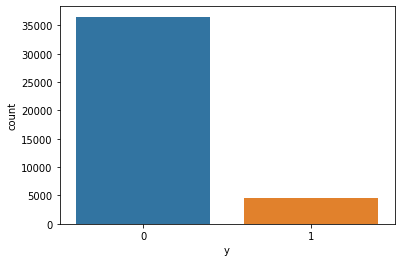

In [208]:
# melihat sebaran y target pada data awal
sns.countplot(data=df, x='y')

> Terlihat dari sebaran data target yang sangat tidak imbang terutama untuk customer yang mau mengikuti campaign yang ditawarkan membuat model kurang baik dalam memprediksi customer tipe tersebut.

# 11. Kesimpulan dan Saran

Kesimpulan dari Model yang dibuat:
- Model yang dipilih dalam kasus ini adalah logistic regression dengan hyperparameter 'C': 760, 'penalty': 'l2', 'solver': 'lbfgs'
- Model tersebut mampu menghasilkan akurasi 0.898 pada data test, dengan F1 score 0.94 dan 0.49.
- Model logistic regression ini dapat memprediksi dengan baik, khususnya untuk konsumen yang berpotensi menolak tawaran campaign saat dihubungi.
- Model ini bagus dipakai guna mengurangi cost yang timbul untuk menghubungi customer yang besar kemungkinan akan menolak tawaran.
- Akan tetapi model lalai dalam menyeleksi yang customer yang mau mengikuti campaign yang ditawarkan sehingga dapat menimbulkan opportunity cost.
- Sehingga perlu dipertimbangkan profit dan lossnya sebelum mengimplementasikan model.
- Adapun langkah-langkah yang dapat memperbaiki performa model adalah memperbanyak data khususnya dari fitur-fitur yang tidak imbang seperti pekerjaan, dll

Insight lainnya yang dapat diterapkan:
- Berdasarkan data poutcome vs previous, semakin sering dihubungi maka persentase customer mau mengikuti campaign akan semakin tinggi. Maka bisa diperbanyak frekuensi menghubungi customernya.
- Berdasarkan data month, pada bulan maret, september, october, dan december merupakan bulan dengan persentase penetrasi campaign yang cukup tinggi (> 43%) dari campaign sebelumnya. Sehingga dapat memperbanyak campaign pada bulan-bulan tersebut.
- Akan lebih mudah menerapkan campaign ke customer yang pernah bersedia mengikuti campaign sebelumnya. jadi itu bisa tetap dibuatkan program loyalitas dan tetap harus dihubungi pada campaign selanjutnya.


